<a href="https://colab.research.google.com/github/Vineethreddybala12/day8/blob/main/day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


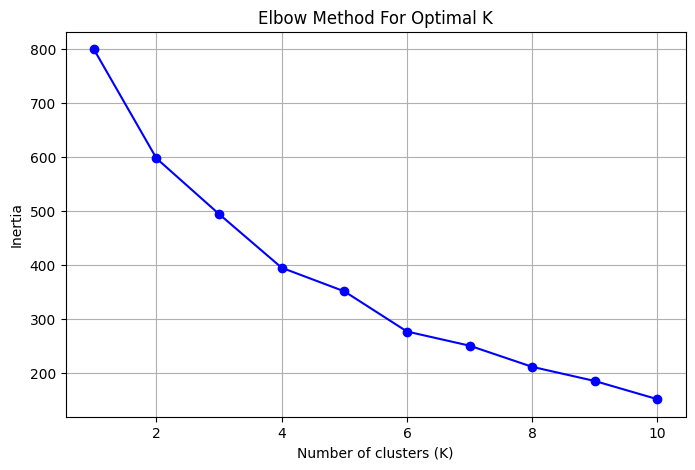

Silhouette Score for k=5: 0.2719


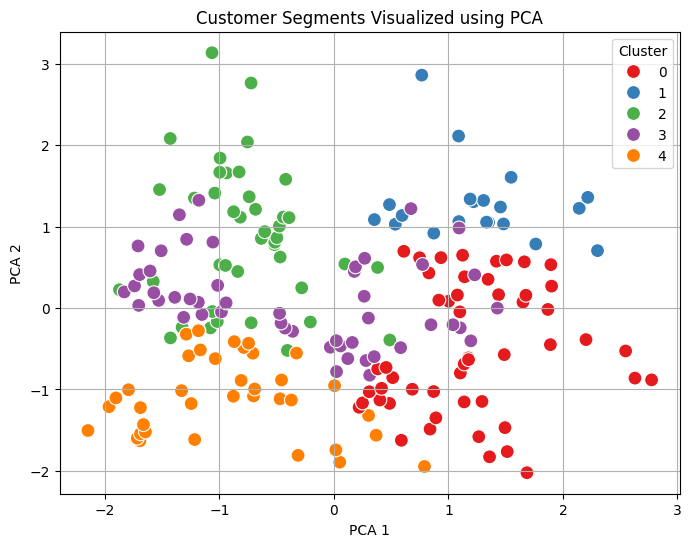

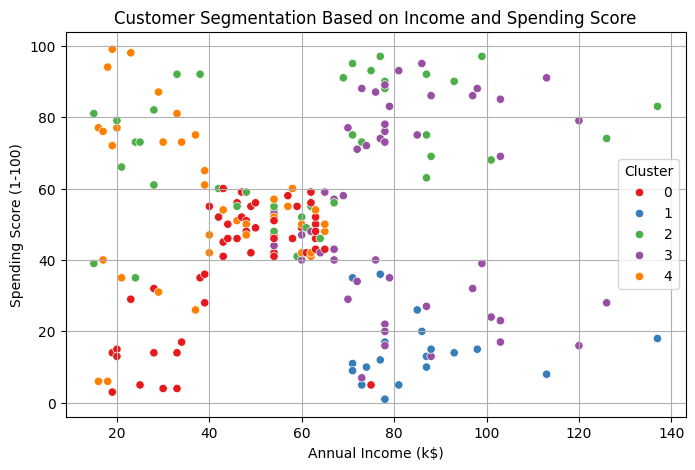

In [11]:
# mall_customer_clustering.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import zipfile
import os


# Load CSV file
data_path = "Mall_Customers.csv"
df = pd.read_csv(data_path)


print("Initial Data:\n", df.head())

# Drop CustomerID (not useful for clustering)
df = df.drop('CustomerID', axis=1)

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


optimal_k = 5  # Change this based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to DataFrame
df['Cluster'] = clusters


score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for k={optimal_k}: {score:.4f}")


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set1', s=100)
plt.title('Customer Segments Visualized using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.grid(True)
plt.show()
